In [1]:
import tensorflow

In [2]:
#mounting the google drive for importing the data
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!ls gdrive/MyDrive/


'App Form MASTER (1).docx'
'App Form MASTER.docx'
'A. Pre-Tenancy Form 2023 (005).docx'
'Blank NRLA Tenancy Application Form.gdoc'
'Blank NRLA Tenancy Application Form.pdf'
 cat.jpg
 Churn_Modelling.csv
'Colab Notebooks'
'Copy of 1 Page (A4 Size).gdoc'
'Copy of 3 Page (A4 Size).gdoc'
'Doc 28 Jul 2023, 8.17-1.jpg'
'Doc Jul 30, 2019, 17:57-1.jpg'
'Doc Mar 04, 2021, 20:43-1.jpg'
'Doc Mar 04, 2021, 20:43-2.jpg'
'Doc Mar 04, 2021, 20:43-3.jpg'
'Emmanuel+Olanrewaju+CV+(14) (1).docx'
'Emmanuel+Olanrewaju+CV+(14).docx'
'Emmanuel Olanrewaju electronics engineer.pdf'
'Emmanuel Olanrewaju original updated CV (1).docx'
'Emmanuel Olanrewaju original updated CV.docx'
"Emmanuel Olanrewaju's CV.gdoc"
"Emmanuel Olanrewaju's CV.pdf"
'Emmanuel Olanrewaju tech CV.pdf'
 LBU_Campus_Maps.gdoc
 LBU_Campus_Maps.pdf
"Let's build.gsheet"
'NRLA AST agreement.gdoc'
'NRLA AST agreement.pdf'
'NRLA guarantor form.gdoc'
'NRLA guarantor form.pdf'
'Onboarding for Bro Bright.gform'
 pneumonia-xray-images.zip
'Police Repo

In [4]:
!unzip gdrive/MyDrive/pneumonia-xray-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [5]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [6]:
#setting the training data directory
DataDir= r"chest_xray/train/"

In [7]:
# initializing the category of classification
CATEGORIES=["NORMAL", "PNEUMONIA"]

In [8]:
!ls chest_xray/testy

ls: cannot access 'chest_xray/testy': No such file or directory


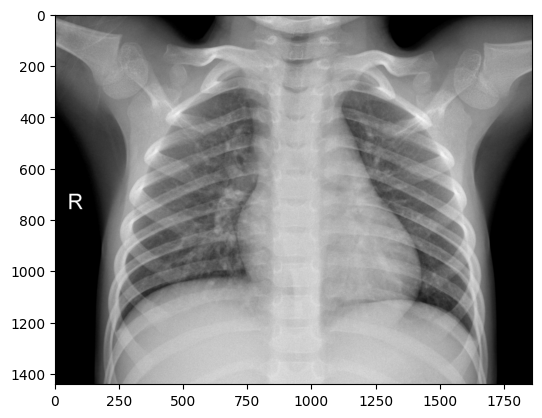

In [9]:
# converting the images into grayscalen
for i in CATEGORIES:
  path=os.path.join(DataDir,i)
  for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array,cmap='gray')
    plt.show()
    break
  break

In [10]:
#initializing the size of the image so that every image should be in same dimension
img_size=100

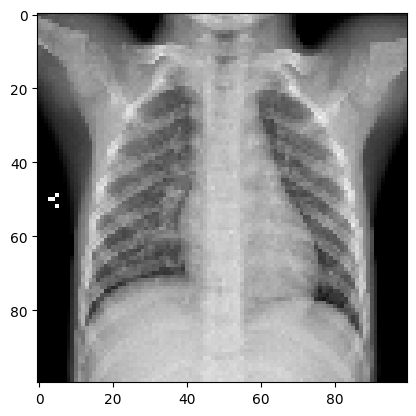

In [11]:
#image after resize and grayscale
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array,cmap='gray')
plt.show()

In [12]:
training_data=[]

In [13]:
# defining the function for training data according to the categories converting the images into gray scale with resolution decreased
#converting it into numpy array
def create_training_data():
  for i in CATEGORIES:

    path=os.path.join(DataDir,i)
    class_num=CATEGORIES.index(i)

    for img in os.listdir(path):
      try:
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        new_array=cv2.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])

      except Exception as e:
        pass


In [14]:
create_training_data()

In [15]:
print(len(training_data))

5216


In [16]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
  print(sample)

[array([[120,  64,  65, ..., 115, 112, 116],
       [180,  78,  62, ..., 115, 113,  67],
       [114, 185,  68, ..., 121, 112,  60],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8), 0]
[array([[46, 60, 74, ..., 15, 20, 20],
       [47, 58, 72, ..., 16, 15, 19],
       [39, 55, 68, ..., 16, 15, 17],
       ...,
       [21, 20, 16, ..., 12, 16, 19],
       [17, 21, 20, ..., 12, 14, 16],
       [19, 21, 22, ..., 21, 20, 19]], dtype=uint8), 0]
[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 1]
[array([[  0,  13,  27, ...,  65,  83, 159],
       [  0,   7,  19, ...,  65,  85, 157],
       [  0,   0,  14, ...,  63,  79, 158],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,  

In [17]:
x=[]
y=[]

In [18]:
# splitting the features and labels
for features,label in training_data:
  x.append(features)
  y.append(label)

In [19]:
print(x[0].reshape(-1,img_size,img_size,1))

[[[[120]
   [ 64]
   [ 65]
   ...
   [115]
   [112]
   [116]]

  [[180]
   [ 78]
   [ 62]
   ...
   [115]
   [113]
   [ 67]]

  [[114]
   [185]
   [ 68]
   ...
   [121]
   [112]
   [ 60]]

  ...

  [[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]]]


In [20]:
y = np.array(y)

In [21]:
# reshapping the features for making it compatible with tensorflow
x=np.array(x).reshape(-1,img_size,img_size,1)


In [22]:
#as we do for training data similarly doing with validation data
validation_data=[]
DataDir_val= r"chest_xray/val/"

In [23]:
def create_validating_data():
  for i in CATEGORIES:

    path=os.path.join(DataDir_val,i)
    class_num=CATEGORIES.index(i)

    for img in os.listdir(path):
      try:
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        new_array=cv2.resize(img_array,(img_size,img_size))
        validation_data.append([new_array,class_num])

      except Exception as e:
        pass


In [24]:
create_validating_data()
print(len(validation_data))

16


In [25]:
import random
random.shuffle(validation_data)
for sample in validation_data[:10]:
  print(sample)

[array([[  0,  85, 102, ...,  95,  73,  51],
       [ 50,  77,  90, ...,  83,  60,  39],
       [ 44,  62,  95, ...,  76,  55,  34],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8), 0]
[array([[ 13,  24,  31, ...,   0,   0,   0],
       [ 12,  24,  96, ...,   0,   0,   0],
       [ 11, 254, 163, ...,   0,   0,   0],
       ...,
       [  0,  19,  28, ...,   0,   0,   0],
       [  0,  20,  27, ...,   0,   0,   0],
       [  0,  18,  28, ...,   0,   0,   0]], dtype=uint8), 1]
[array([[17, 19, 26, ..., 27, 15, 17],
       [18, 23, 33, ..., 53, 43, 22],
       [19, 27, 32, ..., 51, 35, 28],
       ...,
       [ 6,  4,  5, ...,  0,  2,  3],
       [ 6,  4,  5, ...,  0,  2,  3],
       [ 5,  6,  3, ...,  0,  2,  0]], dtype=uint8), 1]
[array([[  2, 107,  75, ...,   0,   3,  10],
       [ 59, 105,  51, ...,   2,   0,  21],
       [122,  96,  15, ...,  11,   8,  35],
       ...,
      

In [26]:
x_val=[]
y_val=[]

In [27]:
for features,label in validation_data:
 x_val.append(features)
 y_val.append(label)

In [28]:
y_val = np.array(y_val)
x_val=np.array(x_val).reshape(-1,img_size,img_size,1)

In [29]:
# importing the library for training the model and adding the neural network layers

In [30]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
import pickle

In [31]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [32]:
#\pixels value ranges from 0 to 255, 0 means black, 255 means white...
# In order to scale it down to a scale of 0 to 1, we are performing this step
x=x/255.0
x_val=x_val/255.0

In [33]:
x.shape

(5216, 100, 100, 1)

In [34]:
x_val.shape

(16, 100, 100, 1)

In [35]:
#initializing the neural network layer for training the model
model = Sequential()

model.add(Conv2D(64,(3,3),input_shape=x.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(.2))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(.2))

model.add(Conv2D(256,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(.2))

model.add(Flatten())
model.add(Dense(64))

model.add(Dropout(.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 98, 98, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 47, 47, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 21, 21, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,638,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,008,193 (7.66 MB)

 Trainable params: 2,008,193 (7.66 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [38]:
#fitting the model with 10 epochs and using the validation data we have created
model.fit(x,y,batch_size=4,epochs=10,validation_data=(x_val, y_val))

Epoch 1/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 293s 222ms/step - accuracy: 0.8049 - loss: 0.5035 - val_accuracy: 0.7500 - val_loss: 0.3881
Epoch 2/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 321s 222ms/step - accuracy: 0.9379 - loss: 0.1735 - val_accuracy: 0.8125 - val_loss: 0.3036
Epoch 3/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 288s 221ms/step - accuracy: 0.9514 - loss: 0.1332 - val_accuracy: 0.9375 - val_loss: 0.1211
Epoch 4/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 323s 222ms/step - accuracy: 0.9587 - loss: 0.1075 - val_accuracy: 1.0000 - val_loss: 0.0955
Epoch 5/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 319s 219ms/step - accuracy: 0.9612 - loss: 0.1026 - val_accuracy: 0.8750 - val_loss: 0.1988
Epoch 6/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 287s 220ms/step - accuracy: 0.9684 - loss: 0.0871 - val_accuracy: 0.9375 - val_loss: 0.1110
Epoch 7/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 322s 220ms/step - accuracy: 0.9730 - loss: 0.0771 - val_accuracy: 1.0000 - val_loss: 0.0740
Epoch 8/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 285s 219ms/step - ac

In [40]:
# Saving the model
model.save(r"chest_xray/model_10.keras")

In [41]:
# importing the library for testing the model

In [42]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import load_model

In [43]:
CATEGORIES=["NORMAL", "PNEUMONIA"]

In [54]:
from keras.src.utils.image_utils import img_to_array
from keras.src.layers.preprocessing.tf_data_layer import keras
# function for preparing the image for predicting the class
def prepare(image):
  img_size=100
  #img_array=cv2.imread(image,cv2.IMREAD_GRAYSCALE)
  img=tf.keras.preprocessing.image.load_img(image, color_mode='grayscale', target_size=(img_size,img_size))
  new_array=tf.keras.preprocessing.image.img_to_array(img)

  return new_array.reshape(-1,img_size,img_size,1)

In [45]:
model = tf.keras.models.load_model(r"chest_xray/model_10.keras")

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [50]:
image= r'chest_xray/test/NORMAL/NORMAL2-IM-0110-0001.jpeg'

In [53]:
prediction=model.predict([prepare(image)/255.0])
print(prediction)
print(round(prediction[0][0]))
print(CATEGORIES[int(round(prediction[0][0]))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[[0.1130273]]
0
NORMAL


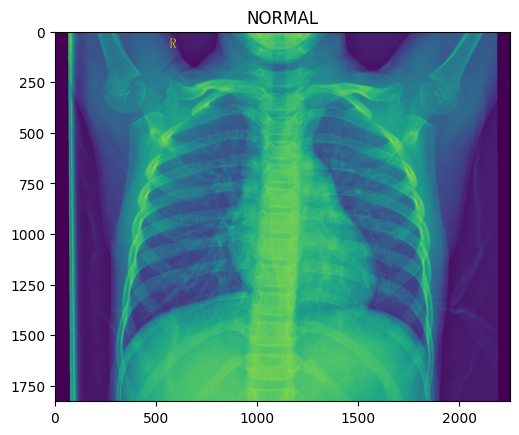

In [55]:
img=mpimg.imread(image)
imgplot=plt.imshow(img)
plt.title(CATEGORIES[int(prediction[0][0])])
plt.show()

In [56]:
!ls chest_xray/test/

NORMAL	PNEUMONIA


In [58]:
image2= r'chest_xray/test/PNEUMONIA/person100_bacteria_480.jpeg'

In [59]:
prediction=model.predict([prepare(image2)/255.0])
print(prediction)
print(round(prediction[0][0]))
print(CATEGORIES[int(round(prediction[0][0]))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
[[0.99998045]]
1
PNEUMONIA
